<a href="https://colab.research.google.com/github/Zeko2005/cap-comp215/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: SIR Epidemiological Model

Name:Ziad Elbadry

Last Updated: 19/2/2024

In [20]:
%matplotlib inline

import math
import random

import matplotlib.pyplot as plt
import networkx as nx
import copy
random.seed(6)

In [21]:
def coin_toss(p):
    """ Simulate flipping a biased "coin", where the probability of 'heads' is p.  Return True iff 'heads', False otherwise """
    return random.random() < p

In [22]:
num_people = 10
average_num_edges = 4
SIRgraph = nx.watts_strogatz_graph(n = num_people, k=average_num_edges, p=0.5)

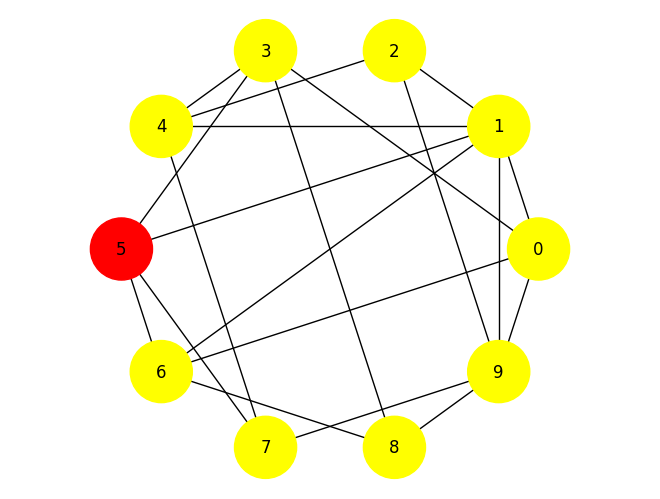

In [23]:
node_colors = ['yellow' for i in range(num_people)]
case0 = random.randint(0, 9)
node_colors[case0] = 'red'
nx.draw_circular(SIRgraph,
                 node_color= node_colors,
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

In [24]:
#S is yellow
#I is red
#R is blue
InfectedCases = set()
InfectedCases.add(case0)
RecoveredCases = set()

In [25]:
def find_num_cases(g, cases):
  """ find the number of cases that could be infected """
  possible_cases = set()
  for i in cases:
    for j in list(g.neighbors(i)):
      possible_cases.add(j)
  return possible_cases

def update_infect(patients, immune):
  new_patients = copy.deepcopy(patients)
  for i in patients:
    if i in immune:
      new_patients.remove(i)
  return new_patients

def step(graph, colors, infect, recover):
  cases = find_num_cases(graph, infect)
  for i in cases:
    if coin_toss(0.5) and i not in recover:
      infect.add(i)
      colors[i] = "red"
  for i in infect:
    if coin_toss(0.3):
      recover.add(i)
      colors[i] = "blue"
  infect = update_infect(infect, recover)
  print(infect)
  return colors


{1, 5, 6}


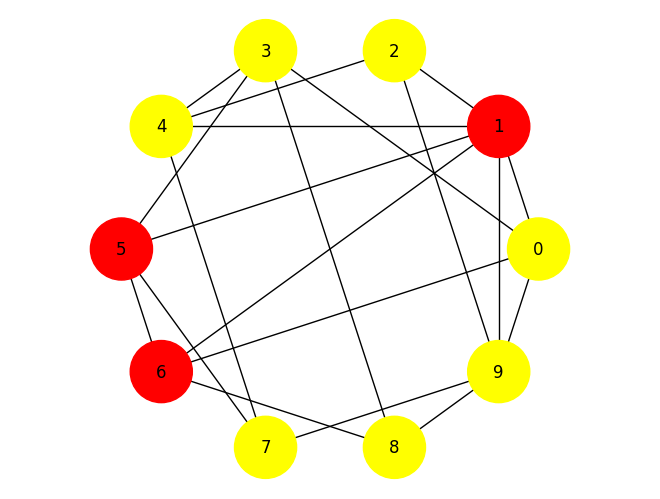

In [26]:
def simulation(n_steps, Graph, ncolors, infected, recovered):
  """ does the simulation for an n number of times """
  for i in range(n_steps):
    return step(Graph, ncolors, infected, recovered)

node_colors = simulation(10000000, SIRgraph, node_colors, InfectedCases, RecoveredCases)

nx.draw_circular(SIRgraph,
                 node_color= node_colors,
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()
